In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, wilcoxon
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib_venn import venn2
import os

In [2]:
fibr_gene_expression_modified=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/filtered_fibroblasts_gene_exp_transposed_w_clinical.csv")
fibr_gene_expression_modified['dcc_filename'] = fibr_gene_expression_modified['dcc_filename'].str.replace('-', '.', regex=False)
fibr_gene_expression_modified

,dcc_filename,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,MAPK8IP2,ARSA,ACR,RABL2B,Sample,PFS_quartile,OS_quartile,BRCA_status,HRP_status,Segment
0,DSP.1001660016604.A.A02.dcc,1.718431,2.137428,1.836881,1.997698,0.161226,2.480789,4.364810,2.270061,0.033787,...,2.097976,1.991563,-0.115321,2.171023,S130_iOme,1,1,0.0,1.0,stroma
1,DSP.1001660016604.A.A04.dcc,1.622100,2.027326,1.737519,1.901971,0.158211,2.375319,5.534481,2.163770,0.033655,...,2.000658,2.633680,-0.114390,2.073686,S130_iOme,1,1,0.0,1.0,stroma
2,DSP.1001660016604.A.A05.dcc,1.427961,1.505719,1.830641,1.348903,0.165076,2.201253,5.497989,2.271254,0.033957,...,1.451180,2.419147,1.253395,1.018083,S130_iOme,1,1,0.0,1.0,tumor
3,DSP.1001660016604.A.A07.dcc,1.353614,1.787912,1.868598,1.631783,0.164922,2.126467,6.245903,2.308907,0.033950,...,1.166335,2.975583,1.474534,1.239250,S130_iOme,1,1,0.0,1.0,tumor
4,DSP.1001660016604.A.A08.dcc,1.829375,1.602863,1.291572,1.448092,0.164608,1.941802,3.836590,1.731314,0.033936,...,1.550127,2.550633,1.858295,1.623058,S130_iOme,1,1,0.0,1.0,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,DSP.1001660037247.C.D01.dcc,1.808434,1.844244,1.772121,1.524628,-0.121914,1.967129,3.434814,2.026795,0.028477,...,1.655130,2.464421,-0.306182,1.698925,S333_pOme,3,1,0.0,1.0,stroma
419,DSP.1001660037247.C.D02.dcc,1.399579,1.726509,1.367213,1.114765,0.917727,2.449179,6.042179,2.140981,0.028518,...,0.842811,2.150309,0.731006,1.291812,S333_pOme,3,1,0.0,1.0,stroma
420,DSP.1001660037247.C.D03.dcc,0.084584,0.164450,-0.030218,-0.168501,-0.042646,0.429389,7.393944,0.414974,0.028022,...,-0.073099,0.116914,-0.150866,-0.062654,S333_pOme,3,1,0.0,1.0,tumor
421,DSP.1001660037247.C.D04.dcc,1.367126,1.920226,1.332952,-0.329163,-0.123800,2.040032,4.567637,2.101017,0.028499,...,1.213638,1.909640,1.102473,1.258566,S333_pOme,3,1,0.0,1.0,stroma


In [3]:
df_cell_abundance = pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_bp_res_mid_lvl_ct_ct_fraction.csv")
df_gene_expression=fibr_gene_expression_modified
df_gene_expression

,dcc_filename,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,MAPK8IP2,ARSA,ACR,RABL2B,Sample,PFS_quartile,OS_quartile,BRCA_status,HRP_status,Segment
0,DSP.1001660016604.A.A02.dcc,1.718431,2.137428,1.836881,1.997698,0.161226,2.480789,4.364810,2.270061,0.033787,...,2.097976,1.991563,-0.115321,2.171023,S130_iOme,1,1,0.0,1.0,stroma
1,DSP.1001660016604.A.A04.dcc,1.622100,2.027326,1.737519,1.901971,0.158211,2.375319,5.534481,2.163770,0.033655,...,2.000658,2.633680,-0.114390,2.073686,S130_iOme,1,1,0.0,1.0,stroma
2,DSP.1001660016604.A.A05.dcc,1.427961,1.505719,1.830641,1.348903,0.165076,2.201253,5.497989,2.271254,0.033957,...,1.451180,2.419147,1.253395,1.018083,S130_iOme,1,1,0.0,1.0,tumor
3,DSP.1001660016604.A.A07.dcc,1.353614,1.787912,1.868598,1.631783,0.164922,2.126467,6.245903,2.308907,0.033950,...,1.166335,2.975583,1.474534,1.239250,S130_iOme,1,1,0.0,1.0,tumor
4,DSP.1001660016604.A.A08.dcc,1.829375,1.602863,1.291572,1.448092,0.164608,1.941802,3.836590,1.731314,0.033936,...,1.550127,2.550633,1.858295,1.623058,S130_iOme,1,1,0.0,1.0,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,DSP.1001660037247.C.D01.dcc,1.808434,1.844244,1.772121,1.524628,-0.121914,1.967129,3.434814,2.026795,0.028477,...,1.655130,2.464421,-0.306182,1.698925,S333_pOme,3,1,0.0,1.0,stroma
419,DSP.1001660037247.C.D02.dcc,1.399579,1.726509,1.367213,1.114765,0.917727,2.449179,6.042179,2.140981,0.028518,...,0.842811,2.150309,0.731006,1.291812,S333_pOme,3,1,0.0,1.0,stroma
420,DSP.1001660037247.C.D03.dcc,0.084584,0.164450,-0.030218,-0.168501,-0.042646,0.429389,7.393944,0.414974,0.028022,...,-0.073099,0.116914,-0.150866,-0.062654,S333_pOme,3,1,0.0,1.0,tumor
421,DSP.1001660037247.C.D04.dcc,1.367126,1.920226,1.332952,-0.329163,-0.123800,2.040032,4.567637,2.101017,0.028499,...,1.213638,1.909640,1.102473,1.258566,S333_pOme,3,1,0.0,1.0,stroma


In [5]:
df_cell_abundance.head(5)

,dcc_filename,tumor,Tcells,Bcells,Fibroblasts,NKcells,Macrophages,Mast cells,DCs,other,Endothelial cells,Roi,Segment,Sample,NACT_status,Annotation_cell,Roi.1,Segment_geomx,Patient,Site
0,DSP-1001660016606-G-A02.dcc,0.476461,0.009487,0.135361,0.231508,0.018543,0.101739,0.001637,0.014749,NaN,0.010419,1,stroma,S053_post,post,posCD8_posIBA1,1.0,tsi,S053,Omentum
1,DSP-1001660016606-G-A03.dcc,0.806981,0.013774,0.026948,0.064725,0.012740,0.055951,0.001264,0.009905,NaN,0.007552,1,tumor,S053_post,post,posCD8_posIBA1,1.0,tsi,S053,Omentum
2,DSP-1001660016606-G-A04.dcc,0.427201,0.009367,0.105530,0.250796,0.012980,0.169353,NaN,0.018545,NaN,0.005558,2,stroma,S053_post,post,posCD8_posIBA1,2.0,tsi,S053,Omentum
3,DSP-1001660016606-G-A05.dcc,0.879490,0.005288,0.010088,0.017065,0.012011,0.058875,0.000828,0.010556,NaN,0.005297,2,tumor,S053_post,post,posCD8_posIBA1,2.0,tsi,S053,Omentum
4,DSP-1001660016606-G-A06.dcc,0.450971,0.015423,0.058719,0.276402,0.017479,0.127136,0.000578,0.023020,NaN,0.030219,3,stroma,S053_post,post,posCD8_posIBA1,3.0,tsi,S053,Omentum


In [6]:
genes_of_interest_target=["FAP","PDGFRB",'PDGFRA', 'S100A4', "LRRC15","IL1R1","IL1R2"]

all_genes_heatmap = fibr_gene_expression_modified.groupby("Sample")[genes_of_interest_target].mean()
all_genes_heatmap

,FAP,PDGFRB,PDGFRA,S100A4,LRRC15,IL1R1,IL1R2
Sample,,,,,,,
S015_post,4.252269,3.930466,4.285210,2.339516,4.430076,3.665432,0.860449
S015_pre,4.685575,4.068355,4.277380,1.933923,3.913688,4.119582,1.097123
S027_post,4.484513,4.964656,4.821016,2.410618,3.879130,4.018146,1.043147
S027_pre,4.160680,3.368646,3.679355,2.005351,4.505910,3.524272,0.931667
S032_post,4.523070,3.861104,4.189979,3.327482,4.558939,3.979005,0.987780
S032_pre,4.136843,4.112199,3.973261,2.657404,4.139567,3.541795,0.904056
S053_post,4.406855,3.588669,3.999232,2.353325,4.210006,3.368609,1.033299
S057_post,4.521965,4.252196,4.182619,3.219359,4.623424,3.753783,1.180576
S065_post,4.380722,4.053146,4.365594,2.277454,3.904068,4.060865,1.247721


In [7]:
df_tcell_abundance_mean=df_cell_abundance.groupby("Sample")["Tcells"].mean()
df_tcell_abundance_mean

Sample
S015_post     0.025240
S015_pre      0.014471
S027_post     0.026630
S027_pre      0.017079
S032_post     0.027653
S032_pre      0.024871
S053_post     0.015224
S057_post     0.013565
S065_post     0.027050
S069_iAdnL    0.044274
S069_pOme     0.040369
S072_post     0.033057
S073_post     0.043510
S076_post     0.034276
S083_iOme2    0.039678
S084_post     0.024665
S084_pre      0.019697
S098_iOme     0.028081
S100_iOme     0.043375
S107_iOme     0.020550
S121_iOme     0.024507
S130_iOme     0.047881
S131_iOme     0.050019
S139_post     0.041333
S139_pre      0.032501
S197_iOme     0.030785
S268_iOme     0.045362
S333_iOvaR    0.025758
S333_pOme     0.029830
Name: Tcells, dtype: float64

In [11]:
merged_df_tcell=pd.merge(df_tcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_tcell["Sample"]=merged_df_tcell.index
merged_df_tcell.head(5)

,Tcells,FAP,PDGFRB,PDGFRA,S100A4,LRRC15,IL1R1,IL1R2,Sample
Sample,,,,,,,,,
S015_post,0.025240,4.252269,3.930466,4.285210,2.339516,4.430076,3.665432,0.860449,S015_post
S015_pre,0.014471,4.685575,4.068355,4.277380,1.933923,3.913688,4.119582,1.097123,S015_pre
S027_post,0.026630,4.484513,4.964656,4.821016,2.410618,3.879130,4.018146,1.043147,S027_post
S027_pre,0.017079,4.160680,3.368646,3.679355,2.005351,4.505910,3.524272,0.931667,S027_pre
S032_post,0.027653,4.523070,3.861104,4.189979,3.327482,4.558939,3.979005,0.987780,S032_post


In [10]:
x_vals = merged_df_tcell['Sample']
samples = merged_df_tcell['Sample'].unique()
genes = genes_of_interest_target

Sample: S015_post, Gene: FAP, Expression: 4.252269231305235, T Cells: 0.02523963581402678
Sample: S015_pre, Gene: FAP, Expression: 4.685574968571409, T Cells: 0.014470737221015563
Sample: S027_post, Gene: FAP, Expression: 4.484512643716022, T Cells: 0.02663027885611226
Sample: S027_pre, Gene: FAP, Expression: 4.160680169565141, T Cells: 0.017078726401844678
Sample: S032_post, Gene: FAP, Expression: 4.523069763761451, T Cells: 0.027653374321470102
Sample: S032_pre, Gene: FAP, Expression: 4.136842979360621, T Cells: 0.024871352465618484
Sample: S053_post, Gene: FAP, Expression: 4.406855211357022, T Cells: 0.015223547744691179
Sample: S057_post, Gene: FAP, Expression: 4.521965197025631, T Cells: 0.013564907151612135
Sample: S065_post, Gene: FAP, Expression: 4.380721943669102, T Cells: 0.027050260177894248
Sample: S069_iAdnL, Gene: FAP, Expression: 4.562792260936212, T Cells: 0.04427408773776262
Sample: S069_pOme, Gene: FAP, Expression: 4.407793968663747, T Cells: 0.040369321649458945
Samp

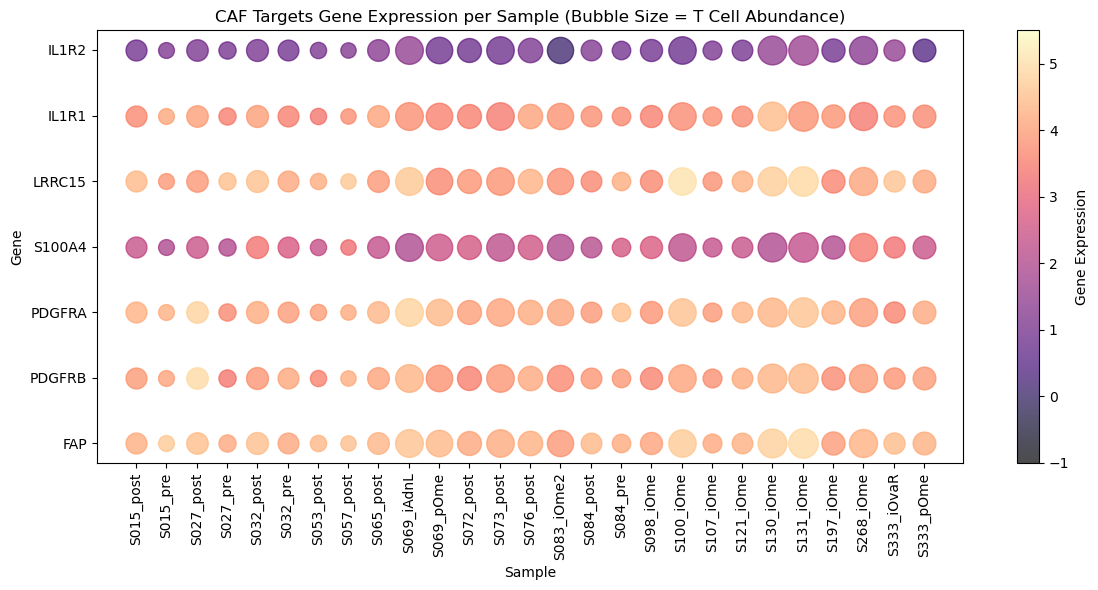

In [18]:

plt.figure(figsize=(12, 6))
merged_df_tcell = merged_df_tcell.dropna()
# Get coordinates for x (samples) and y (genes)
x_vals = merged_df_tcell['Sample']
samples = merged_df_tcell['Sample'].unique()
genes = genes_of_interest_target

# Loop through genes to plot all combinations
for gene in genes:
    for i, sample in enumerate(samples):
        expression = merged_df_tcell.loc[merged_df_tcell['Sample'] == sample, gene].values[0]
        t_cells = merged_df_tcell.loc[merged_df_tcell['Sample'] == sample, 'Tcells'].values[0]
        print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, T Cells: {t_cells}")
        plt.scatter(
            x=sample,
            y=gene,
            s=t_cells * 9000,  # scale bubble size as needed
            c=expression,
            cmap='magma',
            vmin=-1,  # consistent color scale
            vmax=5.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample (Bubble Size = T Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

In [23]:
merged_df_tcell

,Tcells,FAP,PDGFRB,PDGFRA,S100A4,LRRC15,IL1R1,IL1R2,Sample
Sample,,,,,,,,,
S015_post,0.025240,4.252269,3.930466,4.285210,2.339516,4.430076,3.665432,0.860449,S015_post
S015_pre,0.014471,4.685575,4.068355,4.277380,1.933923,3.913688,4.119582,1.097123,S015_pre
S027_post,0.026630,4.484513,4.964656,4.821016,2.410618,3.879130,4.018146,1.043147,S027_post
S027_pre,0.017079,4.160680,3.368646,3.679355,2.005351,4.505910,3.524272,0.931667,S027_pre
S032_post,0.027653,4.523070,3.861104,4.189979,3.327482,4.558939,3.979005,0.987780,S032_post
S032_pre,0.024871,4.136843,4.112199,3.973261,2.657404,4.139567,3.541795,0.904056,S032_pre
S053_post,0.015224,4.406855,3.588669,3.999232,2.353325,4.210006,3.368609,1.033299,S053_post
S057_post,0.013565,4.521965,4.252196,4.182619,3.219359,4.623424,3.753783,1.180576,S057_post
S065_post,0.027050,4.380722,4.053146,4.365594,2.277454,3.904068,4.060865,1.247721,S065_post


In [19]:
df_bcell_abundance_mean=df_cell_abundance.groupby("Sample")["Bcells"].mean()
df_nkcell_abundance_mean=df_cell_abundance.groupby("Sample")["NKcells"].mean()
df_macrophages_abundance_mean=df_cell_abundance.groupby("Sample")["Macrophages"].mean()
df_mast_abundance_mean=df_cell_abundance.groupby("Sample")["Mast cells"].mean()
df_dcs_abundance_mean=df_cell_abundance.groupby("Sample")["DCs"].mean()

In [20]:
merged_df_bcell=pd.merge(df_bcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_bcell["Sample"]=merged_df_bcell.index
merged_df_nkcell=pd.merge(df_nkcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_nkcell["Sample"]=merged_df_nkcell.index
merged_df_macrophages=pd.merge(df_macrophages_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_macrophages["Sample"]=merged_df_macrophages.index
merged_df_mast=pd.merge(df_mast_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_mast["Sample"]=merged_df_mast.index
merged_df_dcs=pd.merge(df_dcs_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_dcs["Sample"]=merged_df_dcs.index

In [22]:
merged_df_bcell

,Bcells,FAP,PDGFRB,PDGFRA,S100A4,LRRC15,IL1R1,IL1R2,Sample
Sample,,,,,,,,,
S015_post,0.006542,4.252269,3.930466,4.285210,2.339516,4.430076,3.665432,0.860449,S015_post
S015_pre,0.006376,4.685575,4.068355,4.277380,1.933923,3.913688,4.119582,1.097123,S015_pre
S027_post,0.026843,4.484513,4.964656,4.821016,2.410618,3.879130,4.018146,1.043147,S027_post
S027_pre,0.006210,4.160680,3.368646,3.679355,2.005351,4.505910,3.524272,0.931667,S027_pre
S032_post,0.017827,4.523070,3.861104,4.189979,3.327482,4.558939,3.979005,0.987780,S032_post
S032_pre,0.006111,4.136843,4.112199,3.973261,2.657404,4.139567,3.541795,0.904056,S032_pre
S053_post,0.035789,4.406855,3.588669,3.999232,2.353325,4.210006,3.368609,1.033299,S053_post
S057_post,0.008769,4.521965,4.252196,4.182619,3.219359,4.623424,3.753783,1.180576,S057_post
S065_post,0.018533,4.380722,4.053146,4.365594,2.277454,3.904068,4.060865,1.247721,S065_post


Sample: S015_post, Gene: FAP, Expression: 4.252269231305235, B Cells: 0.006542208790342274
Sample: S015_pre, Gene: FAP, Expression: 4.685574968571409, B Cells: 0.006376389837227281
Sample: S027_post, Gene: FAP, Expression: 4.484512643716022, B Cells: 0.026842644013539214
Sample: S027_pre, Gene: FAP, Expression: 4.160680169565141, B Cells: 0.006209863263146078
Sample: S032_post, Gene: FAP, Expression: 4.523069763761451, B Cells: 0.017826734196667172
Sample: S032_pre, Gene: FAP, Expression: 4.136842979360621, B Cells: 0.006111474529873687
Sample: S053_post, Gene: FAP, Expression: 4.406855211357022, B Cells: 0.035788964648698574
Sample: S057_post, Gene: FAP, Expression: 4.521965197025631, B Cells: 0.00876871142511947
Sample: S065_post, Gene: FAP, Expression: 4.380721943669102, B Cells: 0.018533348761968584
Sample: S069_iAdnL, Gene: FAP, Expression: 4.562792260936212, B Cells: 0.10659960907362613
Sample: S069_pOme, Gene: FAP, Expression: 4.407793968663747, B Cells: 0.009049368604164202
Sam

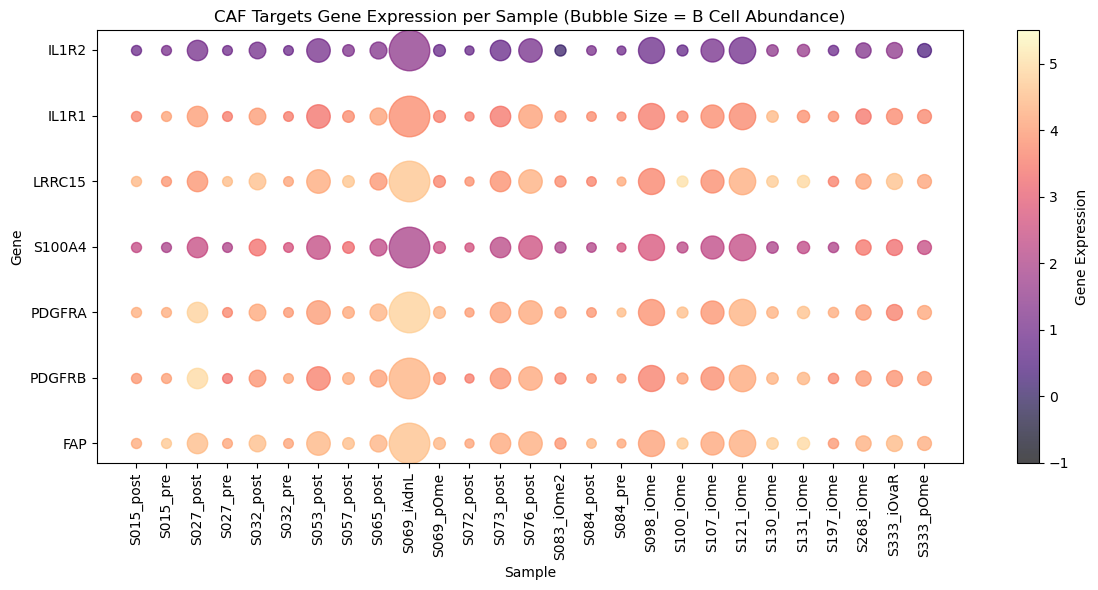

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Bcells column
cols_to_check = ['Sample', 'Bcells'] + genes_of_interest_target
merged_df_bcell = merged_df_bcell.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_bcell['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_bcell.loc[merged_df_bcell['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        b_cells = row['Bcells'].values[0]

        print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, B Cells: {b_cells}")

        plt.scatter(
            x=sample,
            y=gene,
            s=b_cells * 8000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=-1,
            vmax=5.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample (Bubble Size = B Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


Sample: S015_post, Gene: FAP, Expression: 4.252269231305235, NK Cells: 0.036470566005821346
Sample: S015_pre, Gene: FAP, Expression: 4.685574968571409, NK Cells: 0.040946526488903144
Sample: S027_post, Gene: FAP, Expression: 4.484512643716022, NK Cells: 0.03769574799665181
Sample: S027_pre, Gene: FAP, Expression: 4.160680169565141, NK Cells: 0.016596416224397295
Sample: S032_post, Gene: FAP, Expression: 4.523069763761451, NK Cells: 0.018504109881872798
Sample: S032_pre, Gene: FAP, Expression: 4.136842979360621, NK Cells: 0.01903223906705306
Sample: S053_post, Gene: FAP, Expression: 4.406855211357022, NK Cells: 0.015626631355361624
Sample: S057_post, Gene: FAP, Expression: 4.521965197025631, NK Cells: 0.019616556622121365
Sample: S065_post, Gene: FAP, Expression: 4.380721943669102, NK Cells: 0.029378821994616444
Sample: S069_iAdnL, Gene: FAP, Expression: 4.562792260936212, NK Cells: 0.030205942348430756
Sample: S069_pOme, Gene: FAP, Expression: 4.407793968663747, NK Cells: 0.02995659901

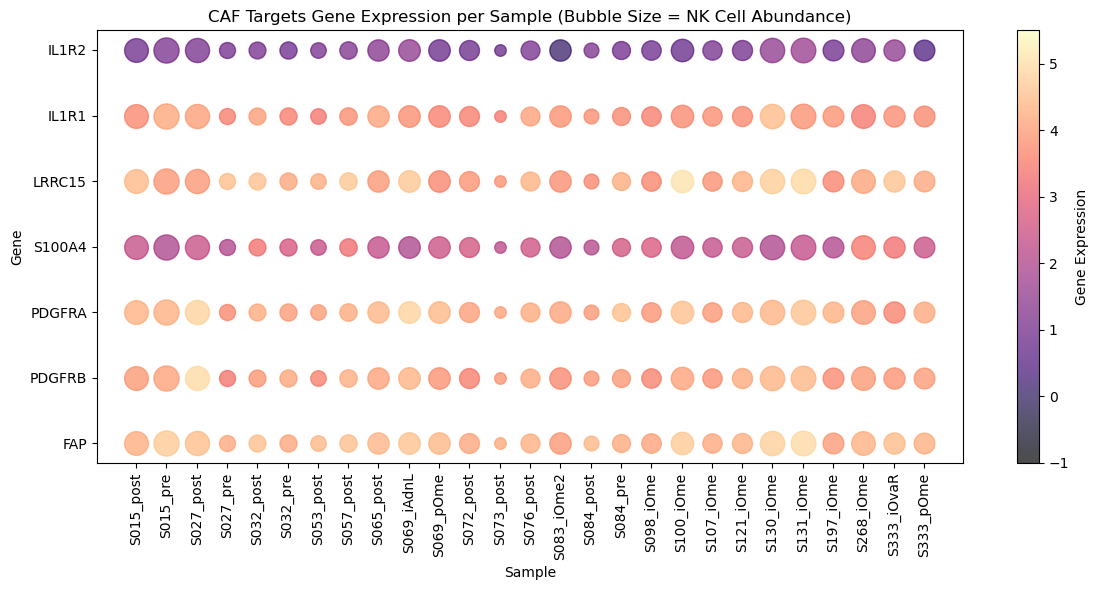

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in NKcells column
cols_to_check = ['Sample', 'NKcells'] + genes_of_interest_target
merged_df_nkcell = merged_df_nkcell.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_nkcell['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_nkcell.loc[merged_df_nkcell['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        nk_cells = row['NKcells'].values[0]

        print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, NK Cells: {nk_cells}")

        plt.scatter(
            x=sample,
            y=gene,
            s=nk_cells * 8000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=-1,
            vmax=5.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample (Bubble Size = NK Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


Sample: S015_post, Gene: FAP, Expression: 4.252269231305235, Macrophages: 0.0890074063680055
Sample: S015_pre, Gene: FAP, Expression: 4.685574968571409, Macrophages: 0.07530916007133266
Sample: S027_post, Gene: FAP, Expression: 4.484512643716022, Macrophages: 0.06967337011573738
Sample: S027_pre, Gene: FAP, Expression: 4.160680169565141, Macrophages: 0.10696529905773078
Sample: S032_post, Gene: FAP, Expression: 4.523069763761451, Macrophages: 0.1420860495652854
Sample: S032_pre, Gene: FAP, Expression: 4.136842979360621, Macrophages: 0.09441000841685673
Sample: S053_post, Gene: FAP, Expression: 4.406855211357022, Macrophages: 0.09688339248935875
Sample: S057_post, Gene: FAP, Expression: 4.521965197025631, Macrophages: 0.12642128915999012
Sample: S065_post, Gene: FAP, Expression: 4.380721943669102, Macrophages: 0.08739904330543062
Sample: S069_iAdnL, Gene: FAP, Expression: 4.562792260936212, Macrophages: 0.13948995885861465
Sample: S069_pOme, Gene: FAP, Expression: 4.407793968663747, Mac

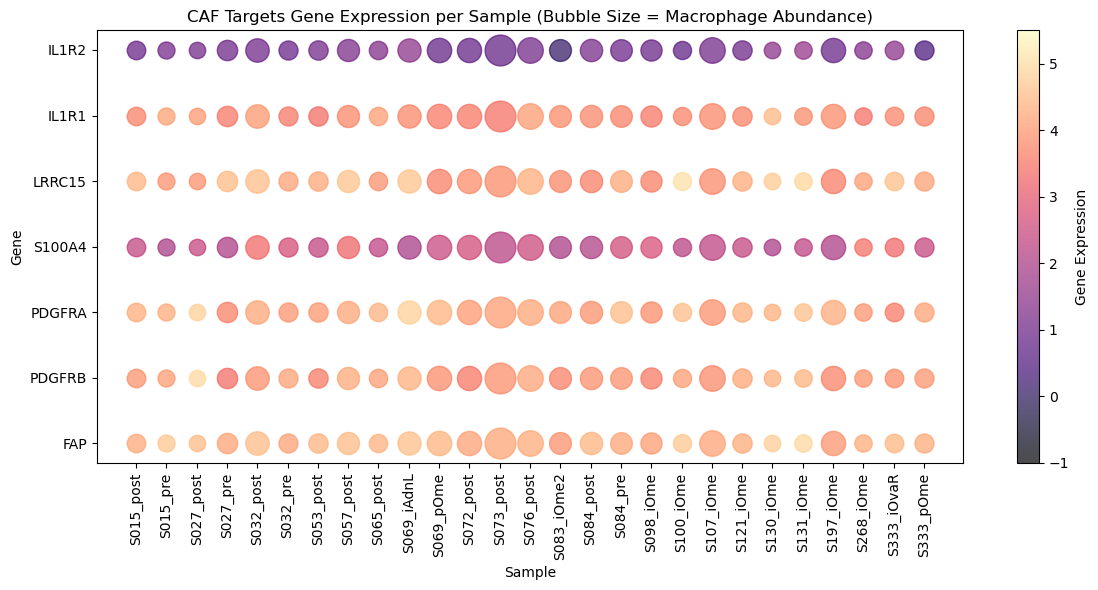

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Macrophages column
cols_to_check = ['Sample', 'Macrophages'] + genes_of_interest_target
merged_df_macrophages = merged_df_macrophages.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_macrophages['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_macrophages.loc[merged_df_macrophages['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        macrophages = row['Macrophages'].values[0]

        print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, Macrophages: {macrophages}")

        plt.scatter(
            x=sample,
            y=gene,
            s=macrophages * 2000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=-1,
            vmax=5.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample (Bubble Size = Macrophage Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


Sample: S015_post, Gene: FAP, Expression: 4.252269231305235, Mast Cells: 0.00215624546435445
Sample: S015_pre, Gene: FAP, Expression: 4.685574968571409, Mast Cells: 0.0024908681817132623
Sample: S027_post, Gene: FAP, Expression: 4.484512643716022, Mast Cells: 0.0015817366262061998
Sample: S027_pre, Gene: FAP, Expression: 4.160680169565141, Mast Cells: 0.0008908984619001222
Sample: S032_post, Gene: FAP, Expression: 4.523069763761451, Mast Cells: 0.0012629530525745667
Sample: S032_pre, Gene: FAP, Expression: 4.136842979360621, Mast Cells: 0.0009375141983330615
Sample: S053_post, Gene: FAP, Expression: 4.406855211357022, Mast Cells: 0.0009527255578825449
Sample: S057_post, Gene: FAP, Expression: 4.521965197025631, Mast Cells: 0.0012695210058110101
Sample: S065_post, Gene: FAP, Expression: 4.380721943669102, Mast Cells: 0.0013555234072986737
Sample: S069_iAdnL, Gene: FAP, Expression: 4.562792260936212, Mast Cells: 0.0032486741004580906
Sample: S069_pOme, Gene: FAP, Expression: 4.4077939686

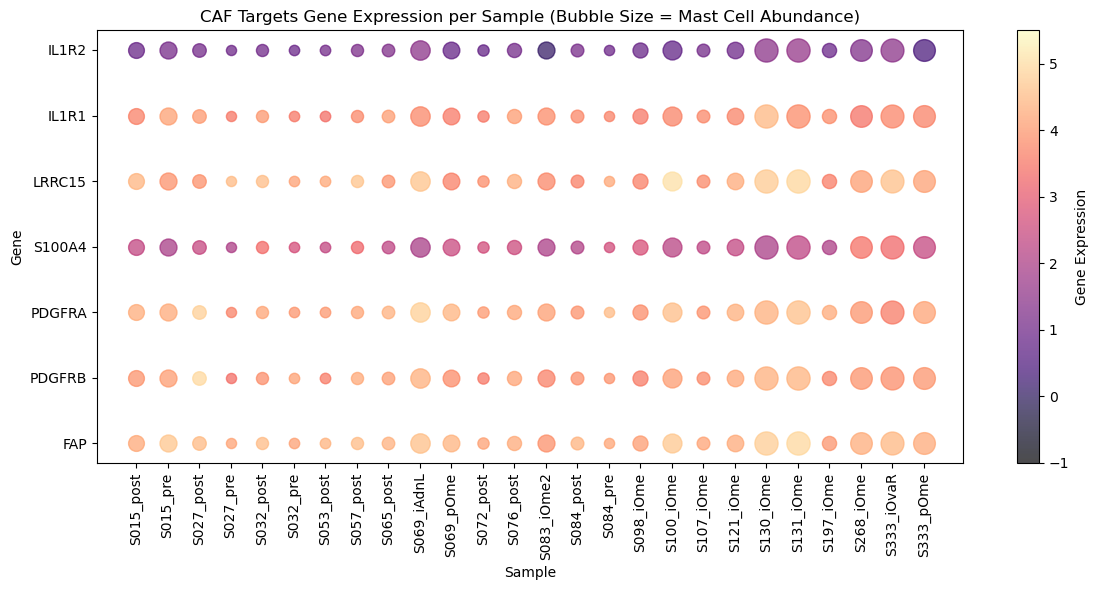

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Mast column
cols_to_check = ['Sample', 'Mast cells'] + genes_of_interest_target
merged_df_mast = merged_df_mast.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_mast['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_mast.loc[merged_df_mast['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        mast_cells = row['Mast cells'].values[0]

        print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, Mast Cells: {mast_cells}")

        plt.scatter(
            x=sample,
            y=gene,
            s=mast_cells * 60000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=-1,
            vmax=5.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample (Bubble Size = Mast Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


Sample: S015_post, Gene: FAP, Expression: 4.252269231305235, DCs: 0.0287692600678786
Sample: S015_pre, Gene: FAP, Expression: 4.685574968571409, DCs: 0.027980663800468236
Sample: S027_post, Gene: FAP, Expression: 4.484512643716022, DCs: 0.0270140414988115
Sample: S027_pre, Gene: FAP, Expression: 4.160680169565141, DCs: 0.013152449986256974
Sample: S032_post, Gene: FAP, Expression: 4.523069763761451, DCs: 0.026333369628938758
Sample: S032_pre, Gene: FAP, Expression: 4.136842979360621, DCs: 0.021203019716306077
Sample: S053_post, Gene: FAP, Expression: 4.406855211357022, DCs: 0.01880771383439449
Sample: S057_post, Gene: FAP, Expression: 4.521965197025631, DCs: 0.02040736299079449
Sample: S065_post, Gene: FAP, Expression: 4.380721943669102, DCs: 0.020445769577964706
Sample: S069_iAdnL, Gene: FAP, Expression: 4.562792260936212, DCs: 0.02761534546414858
Sample: S069_pOme, Gene: FAP, Expression: 4.407793968663747, DCs: 0.02406209339314295
Sample: S072_post, Gene: FAP, Expression: 4.148597173

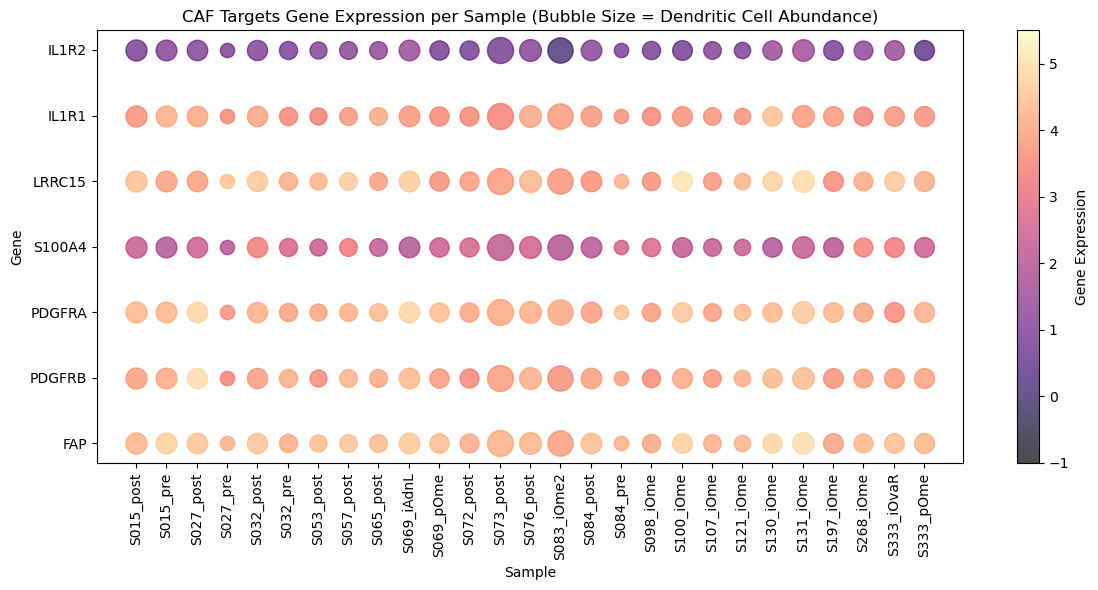

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in DCs column
cols_to_check = ['Sample', 'DCs'] + genes_of_interest_target
merged_df_dcs = merged_df_dcs.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_dcs['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_dcs.loc[merged_df_dcs['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        dcs = row['DCs'].values[0]

        print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, DCs: {dcs}")

        plt.scatter(
            x=sample,
            y=gene,
            s=dcs * 8000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=-1,
            vmax=5.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample (Bubble Size = Dendritic Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()
